In [1]:
import os, sys
dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
if not dir1 in sys.path: sys.path.append(dir1)

In [2]:
from common import *
from sklearn.neural_network import MLPClassifier
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, homogeneity_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib import cm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.decomposition import PCA, FactorAnalysis, FastICA
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [3]:
np.random.seed(0)

In [4]:
import warnings; warnings.simplefilter('ignore')

In [5]:
# Dataset Phone Price
x_train, x_test, y_train, y_test = read_dataset_income(path_to_file="../Data/dataset1/income_evaluation.csv")
x_train.head()

,age,workclass,education,marital-status,occupation,race,sex,hours-per-week,native-country
12132,72,4,11,6,1,4,0,40,39
24787,58,0,11,2,0,2,1,30,39
5923,42,4,11,2,3,4,1,40,39
3464,31,4,9,2,1,4,1,50,39
30739,36,4,9,0,10,4,0,50,39


In [6]:
# preventing information about the distribution of the test set leaking into your model
standard_scaler = MinMaxScaler()
x_train_scaled = standard_scaler.fit_transform(x_train)
x_test_scaled = standard_scaler.fit_transform(x_test)

In [7]:
rc_errors = {}
for i in range(2, 50):
    ica = FastICA(n_components=i, random_state=0)
    x_prime = ica.fit_transform(x_train_scaled)
    
    # reconstruction
    A = np.linalg.pinv(ica.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(x_train_scaled, reconstructed)    
    rc_errors[i] = rc_err

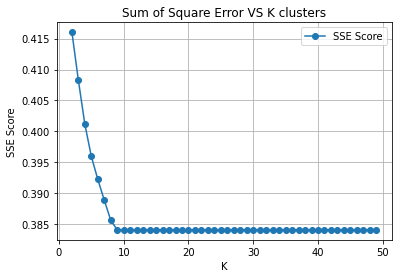

In [8]:
plt.figure()
plt.plot(list(rc_errors.keys()), list(rc_errors.values()), 'o-', label="SSE Score")
plt.title(f"Sum of Square Error VS K clusters")
plt.xlabel("K")
plt.ylabel("SSE Score")
plt.grid()
plt.legend()
plt.show()

In [11]:
comp = 9
ica = FastICA(n_components=comp, random_state=0, max_iter=1000)
ica_result = ica.fit_transform(x_train_scaled)
for i in range(0, comp):
    x_train[f"ica-{i}"] = ica_result[:,i]

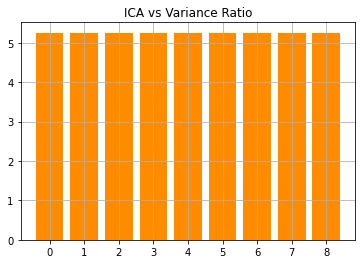

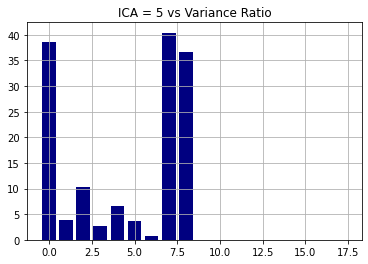

In [12]:
sums_ica = []
for i in range(1, 10):
    ica_f = FastICA(n_components=i, random_state=0)
    ica_f.fit_transform(x_train)
    sums_ica.append(sum(ica.mean_))

ica_f2 = FastICA(n_components=4, random_state=0)
ica_f2.fit_transform(x_train)

plt.figure()
plt.title(f"ICA vs Variance Ratio")
plt.bar(range(len(sums_ica)), sums_ica , color="darkorange")
plt.xticks(range(len(sums_ica)))
plt.grid()
plt.show()

plt.figure()
plt.title(f"ICA = 5 vs Variance Ratio")
plt.bar(range(len(ica_f2.mean_)), ica_f2.mean_, color='navy')
plt.grid()
plt.show()

In [13]:
ica_f2.mean_

array([ 3.86154023e+01,  3.87093059e+00,  1.02915771e+01,  2.61098741e+00,
        6.59889435e+00,  3.66626996e+00,  6.69149263e-01,  4.04148111e+01,
        3.67260826e+01, -2.83437620e-19,  2.35487646e-19,  1.96062113e-19,
        8.56706188e-19,  7.46954027e-19, -6.60644076e-19,  2.99207833e-18,
        3.92124226e-19, -9.56868355e-19])

<AxesSubplot:xlabel='ica-0', ylabel='ica-1'>

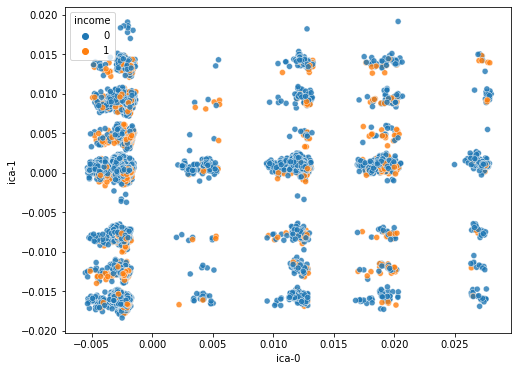

In [18]:
x_train['income'] = y_train['income']
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="ica-0", y="ica-1",
    hue="income",
    data=x_train,
    legend="full",
    alpha=0.8
)

In [32]:
x_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ica-10,ica-11,ica-12,ica-13,ica-14,ica-15,ica-16,ica-17,ica-18,ica-19
1520,1883,0,1.6,0,9,0,24,0.1,87,1,...,-0.029958,0.029763,-0.017002,-0.043119,-0.040829,0.027938,0.032000,-0.003505,0.041267,0.026245
64,702,0,2.6,1,2,1,9,0.7,141,3,...,-0.014530,-0.013860,0.020206,0.001609,0.044182,-0.028182,0.024566,-0.035939,-0.006669,0.026954
1431,1283,1,0.7,1,0,1,27,0.2,80,4,...,0.012754,0.029940,0.045596,-0.044734,-0.025983,-0.025790,0.041907,0.024769,-0.005542,-0.026680
926,1496,1,1.9,1,13,0,38,0.1,126,4,...,0.006948,0.028537,-0.048841,-0.007461,-0.022887,-0.025685,-0.008746,-0.014723,0.047761,-0.027083
983,1175,1,1.3,0,2,0,19,0.3,164,7,...,0.018338,-0.019790,0.009056,0.017179,-0.013438,0.028402,-0.003982,0.011824,-0.038822,-0.028324


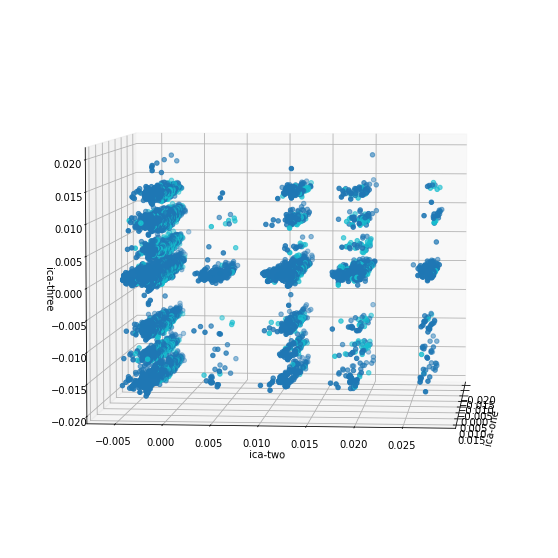

In [47]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=x_train["ica-2"], 
    ys=x_train["ica-0"], 
    zs=x_train["ica-1"], 
    c=x_train["income"], 
    cmap='tab10'
)
ax.set_xlabel('ica-one')
ax.set_ylabel('ica-two')
ax.set_zlabel('ica-three')
ax.view_init(5, 5)
plt.show()

In [ ]:
s = {}
h = {}
clusters = range(2, 10)
for cluster in clusters:
    start_time = time.time()
    kmeans = KMeans(n_clusters=cluster, n_init=50, max_iter=10, random_state=0, n_jobs=-1).fit(ica_result)
    label = kmeans.labels_
    s[cluster] = silhouette_score(ica_result, label, metric='euclidean')
    h[cluster] = homogeneity_score(y_train['income'].values, label)
    print(f"Time taken: Cluster : {i}: {time.time() - start_time}")

In [52]:
sdf = pd.DataFrame(list(s.values()), columns=['Silhouette'])
sdf['Homogeneity'] = pd.DataFrame(list(h.values()))

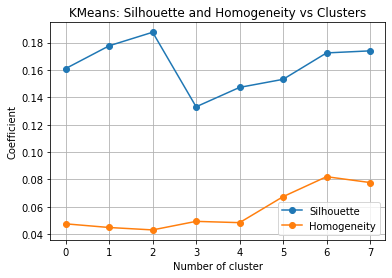

In [59]:
plt.figure()
plt.title(f"KMeans: Silhouette and Homogeneity vs Clusters")
plt.plot(sdf, 'o-')
plt.xlabel("Number of cluster")
plt.ylabel("Coefficient")
plt.grid()
plt.legend(sdf.columns)
plt.xticks(range(sdf.shape[0]))
plt.show()

In [60]:
s_EM = {}
h_EM = {}
log_likelihood_EM = {}
clusters = range(2, 10)
for cluster in clusters:
    print(cluster)
    start_time = time.time()
    gmm = GaussianMixture(n_components=cluster, max_iter=100, random_state=0, n_init=50).fit(ica_result)
    label = gmm.predict(ica_result)
    s_EM[cluster] = silhouette_score(ica_result, label, metric='euclidean')
    h_EM[cluster] = homogeneity_score(y_train['income'].values, label)
    log_likelihood_EM[cluster] = gmm.score(ica_result)
    print(f"Time: {cluster}, {time.time() - start_time}")

2
Time: 2, 43.87558913230896
3
Time: 3, 65.52860879898071
4
Time: 4, 78.38627362251282
5
Time: 5, 84.49659657478333
6
Time: 6, 99.69205641746521
7
Time: 7, 92.70179104804993
8
Time: 8, 113.99158000946045
9
Time: 9, 126.2963764667511


In [63]:
gdf = pd.DataFrame(list(s_EM.values()), columns=['Silhouette'])
gdf['Homogeneity'] = pd.DataFrame(list(h_EM.values()))
gdf['Likelihood'] = pd.DataFrame(list(log_likelihood_EM.values()))

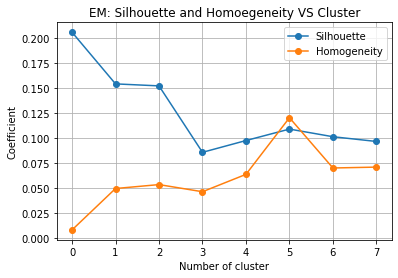

In [127]:
plt.figure()
plt.title("EM: Silhouette and Homoegeneity VS Cluster")
plt.plot(gdf[['Silhouette', 'Homogeneity']], 'o-')
plt.xlabel("Number of cluster")
plt.ylabel("Coefficient")
plt.grid()
plt.legend(['Silhouette', 'Homogeneity'])
plt.show()

In [ ]:
plt.figure()
plt.plot(gdf[['Likelihood']], 'o-', color="green")
plt.xlabel("Number of cluster")
plt.ylabel("Log Likelihood Score")
plt.grid()
plt.legend(['Likelihood'])
plt.show()

In [95]:
# Calculate Kurtosis
def kurt(x):
    n = np.shape(x)[0]
    mean = np.sum((x**1)/n) # Calculate the mean
    var = np.sum((x-mean)**2)/n # Calculate the variance
    skew = np.sum((x-mean)**3)/n # Calculate the skewness
    kurt = np.sum((x-mean)**4)/n # Calculate the kurtosis
    kurt = kurt/(var**2)-3

    return kurt, skew, var, mean

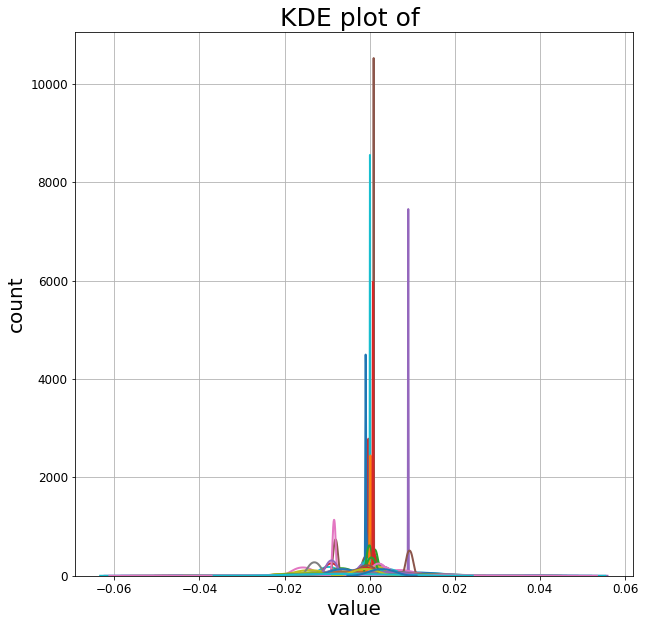

In [99]:
import seaborn as sns
X = x_train
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for i in np.arange(1, X.shape[0], 100):
    sns.kdeplot(X.iloc[i][['ica-1', 'ica-2']], lw=2, label='Mixed Kurtosis={}'.format(np.round(kurt(X.iloc[i])[0], decimals=1)))

# for i in range(X.shape[0]):   
#     sns.kdeplot(unMixed[i, :], lw=5, ls='--', label='unMixed Kurtosis={}'.format(np.around(kurt(unMixed[i, :])[0], decimals=1)))

ax.tick_params(labelsize=12)
ax.set_xlabel('value', fontsize=20)
ax.set_ylabel('count', fontsize=20)
ax.set_title('KDE plot of ', fontsize=25)
plt.grid()
# plt.legend(['ica-1', 'ica-2'])
plt.show()

In [ ]:
nn = MLPClassifier()
nn.fit(ica_result, y_train['income'].values)

In [99]:
y_pred = nn.predict(ica_result)
accuracy = accuracy_score(y_train, y_pred)
print(accuracy)
print(classification_report(y_train, y_pred))

0.9833333333333333
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       660
           1       0.98      0.99      0.98       660

    accuracy                           0.98      1320
   macro avg       0.98      0.98      0.98      1320
weighted avg       0.98      0.98      0.98      1320

